# Задания №1

## 1.k-means

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [63]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, random_state=2)

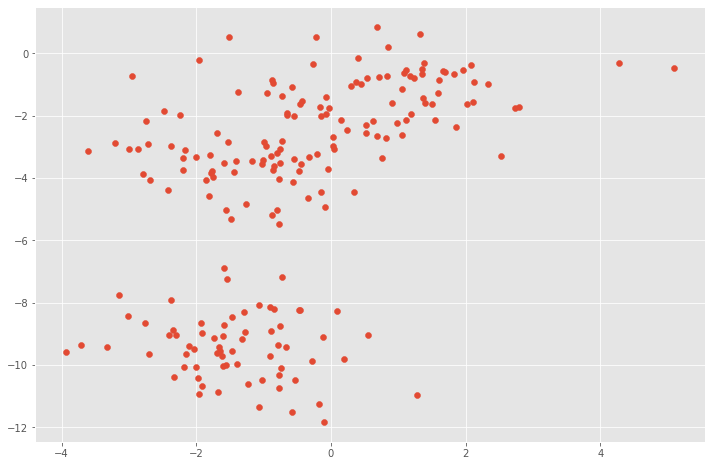

In [64]:
plt.scatter(X[:,0], X[:,1])

In [65]:
from sklearn.cluster import KMeans

In [69]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)

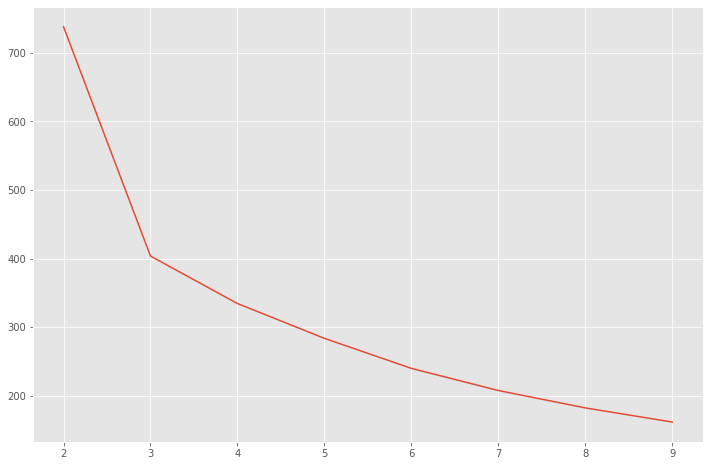

In [70]:
plt.plot(range(2,10), criteries)

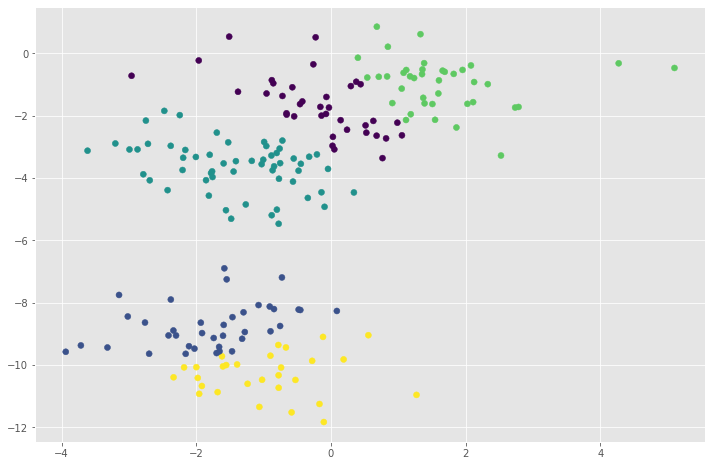

In [74]:
kmeansModel = KMeans(n_clusters=5)
kmeansModel.fit(X)
labels = kmeansModel.labels_
plt.scatter(X[:,0], X[:,1], c=labels)

## 1.DBSCAN

[ 0  1  1  2 -1  0 -1 -1  1  2  1 -1  1  3 -1  2  0 -1  0 -1  1  1  1 -1
  2  1 -1  3  0  0  0  1  2  0  4 -1  2  2 -1  2 -1  2  0  0  1  2  0  2
  0  0  2  0  0 -1  1  1 -1 -1  0 -1  2 -1  1  2 -1  1  2  0  2  0 -1  0
  1 -1  0  2  1  2 -1  1  0  0 -1  0  0  2  0  2 -1  1 -1  2  1 -1  2 -1
  2  2  1  0 -1  0  1  2  0  0  2 -1  1  3  2 -1  0 -1  2  1  0  0  0  2
  1  0  0  1 -1  0  2 -1  0  1  1  0 -1 -1  0 -1  4  2  0  0 -1 -1 -1 -1
 -1  2  2 -1  3  4  0 -1  1 -1 -1  0 -1  0  1  1 -1  3 -1  0  1  0 -1  1
  1  0  0  0  0 -1 -1  2  0 -1 -1 -1 -1  1 -1  0  2  4  1  2  3  1  3 -1
  0  4  2  0 -1 -1 -1  0]


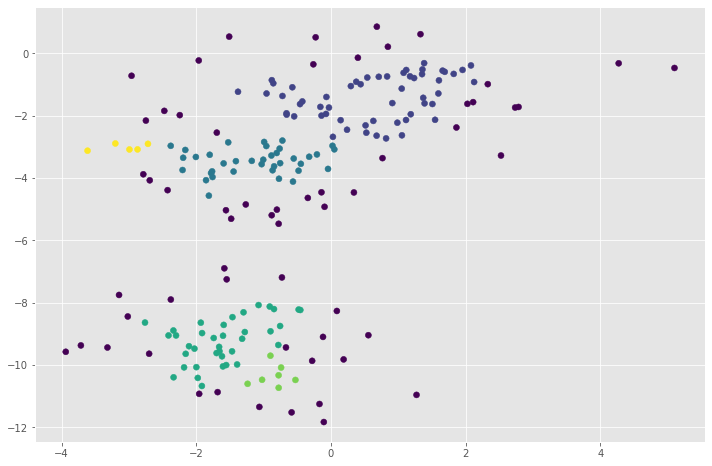

In [76]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering);

# Задания №2

In [78]:
import pandas as pd

In [79]:
data = pd.read_csv("Mall_Customers.csv")

In [81]:
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [91]:
data.rename(columns = {"Annual Income (k$)":"AI","Spending Score (1-100)":"SS"}, inplace = True)
data

CustomerID  Gender  Age   AI  SS
0             1    Male   19   15  39
1             2    Male   21   15  81
2             3  Female   20   16   6
3             4  Female   23   16  77
4             5  Female   31   17  40
..          ...     ...  ...  ...  ..
195         196  Female   35  120  79
196         197  Female   45  126  28
197         198    Male   32  126  74
198         199    Male   32  137  18
199         200    Male   30  137  83

[200 rows x 5 columns]

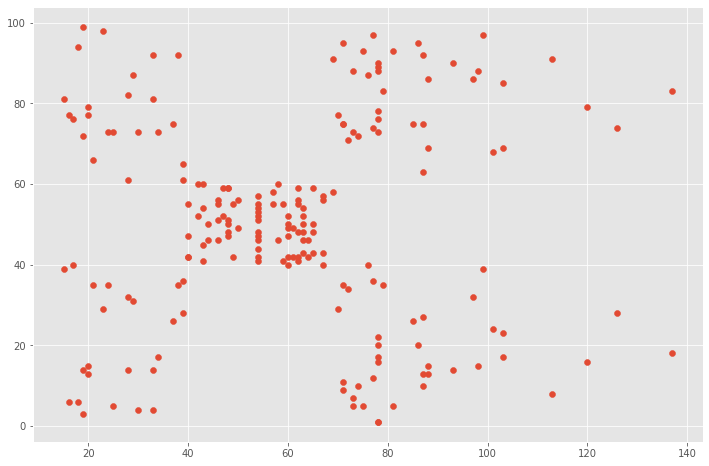

In [92]:
plt.scatter(data.AI,data.SS)

In [129]:
data[["AI", "SS"]]

AI  SS
0     15  39
1     15  81
2     16   6
3     16  77
4     17  40
..   ...  ..
195  120  79
196  126  28
197  126  74
198  137  18
199  137  83

[200 rows x 2 columns]

## 2.k-means

In [130]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(data[["AI", "SS"]])
  criteries.append(kmeansModel.inertia_)

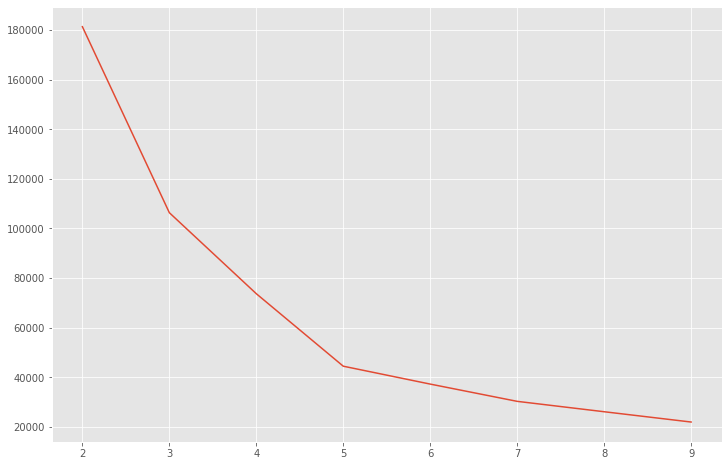

In [131]:
plt.plot(range(2,10), criteries)

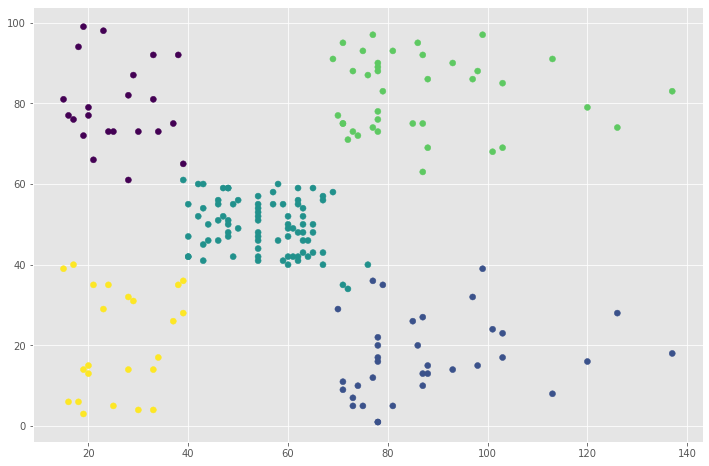

In [133]:
kmeansModel = KMeans(n_clusters=5)
kmeansModel.fit(data[["AI", "SS"]])
labels = kmeansModel.labels_
plt.scatter(data["AI"], data["SS"], c=labels)

## 2.DBSCAN

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  4 -1  2  1  4  3  2  3  2 -1  2  3  4  3  2  3  2  3  4 -1  4
 -1  4 -1  2 -1  4 -1  4 -1  2 -1  4  3  2  3  2 -1  4  3  4 -1 -1 -1  4
 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


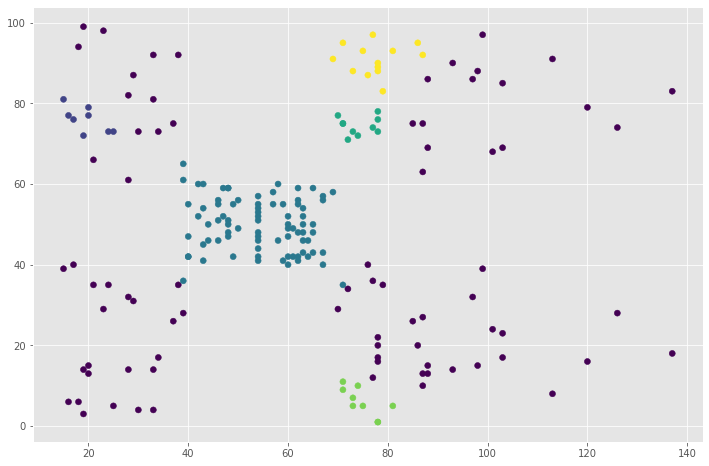

In [162]:
clustering = DBSCAN(eps=7, min_samples = 8).fit_predict(data[["AI", "SS"]])
print(clustering)
plt.scatter(data["AI"], data["SS"], c=clustering)